In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d phylake1337/fire-dataset

 98% 379M/387M [00:03<00:00, 113MB/s]
100% 387M/387M [00:03<00:00, 108MB/s]


In [ ]:
from zipfile import ZipFile
from zipfile import ZipFile

dataset = '/content/fire-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

In [ ]:
input_data = '/content/fire_dataset'

In [ ]:

splitfolders.ratio(input_data , 'fire_out' , seed = 42 , ratio=(.7,.2,.1) ,  group_prefix=None)

Copying files: 999 files [00:02, 375.78 files/s]


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/fire_out/train/fire_images'))
path1, dirs1, files1 = next(os.walk('/content/fire_out/test/fire_images'))
file_count = len(files)
file_count1 = len(files1)
print('Number of images: ', file_count , 'and' , file_count1 )


Number of images:  528 and 76


In [ ]:

import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [ ]:
TRAINING_DIR  = '/content/fire_out/train'
VALIDATION_DIR = '/content/fire_out/val'



In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):





  train_datagen = ImageDataGenerator(rescale=1.0/255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [ ]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/fire_out/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/fire_out/val",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/fire_out/test",
    image_size = (150, 150),
    batch_size = batch_size
)

Found 698 files belonging to 2 classes.
Found 199 files belonging to 2 classes.
Found 102 files belonging to 2 classes.


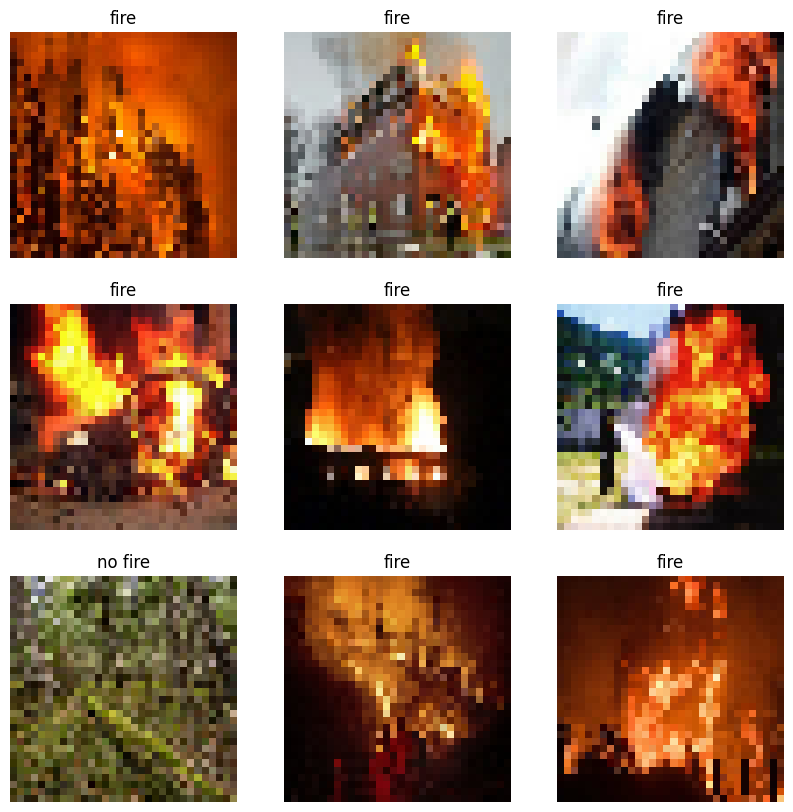

In [ ]:
class_names = ["fire", "no fire"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 698 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


In [ ]:
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS



  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])


  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])


  return model

In [ ]:
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)


Epoch 1/15
22/22 [==============================] - 41s 2s/step - loss: 0.8441 - accuracy: 0.7077 - val_loss: 0.3533 - val_accuracy: 0.7688
Epoch 2/15
22/22 [==============================] - 42s 2s/step - loss: 0.3207 - accuracy: 0.8510 - val_loss: 0.1776 - val_accuracy: 0.9397
Epoch 3/15
22/22 [==============================] - 38s 2s/step - loss: 0.2050 - accuracy: 0.9327 - val_loss: 0.2039 - val_accuracy: 0.9296
Epoch 4/15
22/22 [==============================] - 37s 2s/step - loss: 0.1709 - accuracy: 0.9413 - val_loss: 0.1832 - val_accuracy: 0.9095
Epoch 5/15
22/22 [==============================] - 42s 2s/step - loss: 0.1434 - accuracy: 0.9456 - val_loss: 0.1341 - val_accuracy: 0.9397
Epoch 6/15
22/22 [==============================] - 37s 2s/step - loss: 0.1176 - accuracy: 0.9527 - val_loss: 0.1363 - val_accuracy: 0.9548
Epoch 7/15
22/22 [==============================] - 43s 2s/step - loss: 0.1121 - accuracy: 0.9527 - val_loss: 0.1529 - val_accuracy: 0.9296
Epoch 8/15
22/22 [==

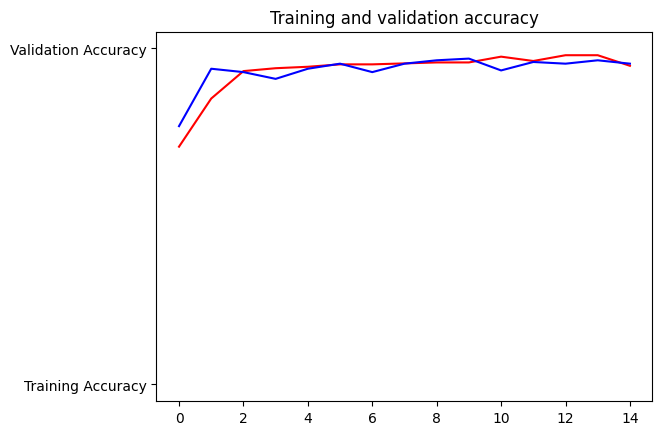

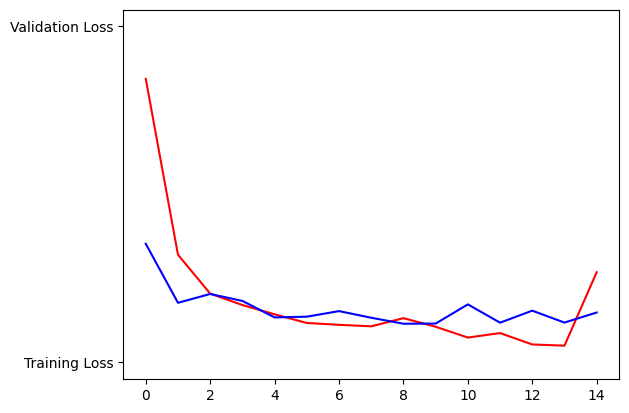

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")


plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()



In [ ]:
testing_dir = '/content/fire_out/test'


test_datagen = ImageDataGenerator(rescale=1.0/255.)

  # Pass in the appropriate arguments to the flow_from_directory method
test_generator = test_datagen.flow_from_directory(directory=testing_dir,
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

Found 102 images belonging to 2 classes.


In [ ]:
import cv2
import numpy as np


predictions = model.predict(test_generator)
predictions = np.round(predictions)

4/4 [==============================] - 4s 883ms/step


In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)



1/1 [==============================] - 0s 238ms/step
[[1.]]


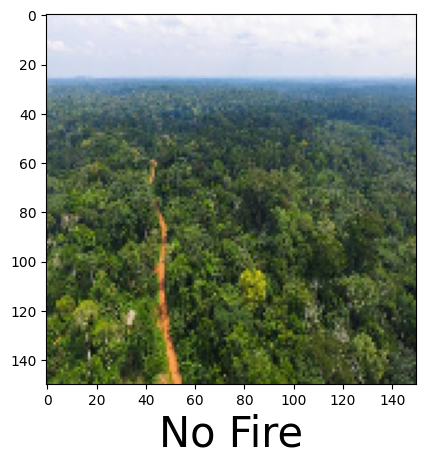

In [ ]:
predictImage('/content/fire_out/test/non_fire_images/non_fire.119.png')


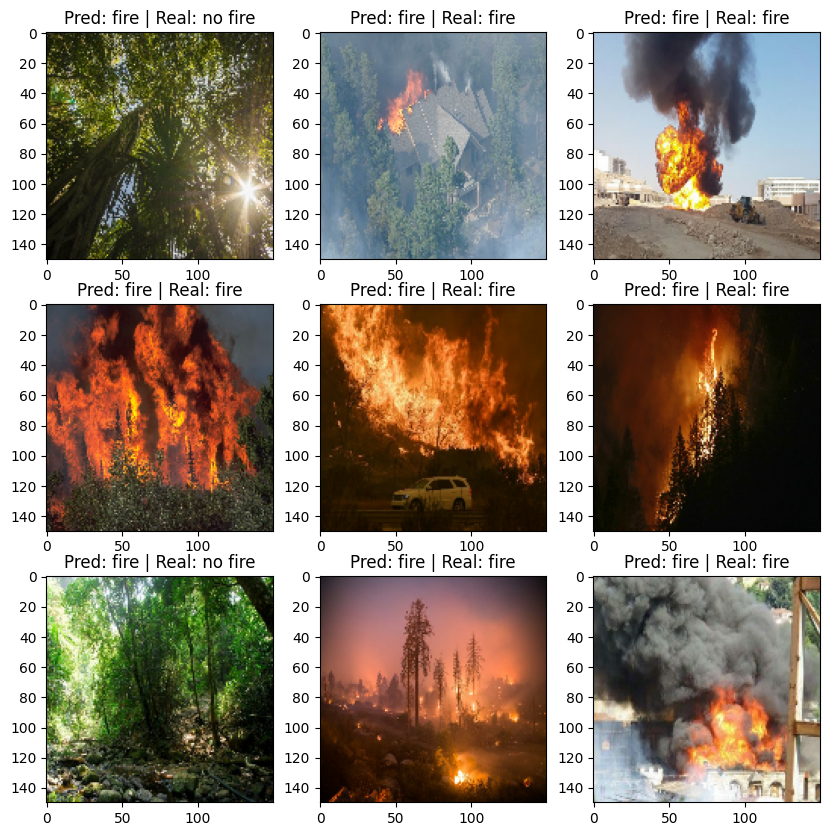

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_fire_model = converter.convert()

with open("firemodel.tflite", 'wb') as f:
  f.write(tflite_fire_model)